### Cloning the Matterplot Mask RCNN repository

In [0]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.90 MiB | 37.13 MiB/s, done.
Resolving deltas: 100% (571/571), done.


### Mount Google Drive with the colab notebook.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

### Copy the custom.py file into a New directory Mask_RCNN

In [0]:
!cp '/content/drive/My Drive/Mask RCNN/custom.py' Mask_RCNN/

### Unzip the dataset.

In [0]:
!unzip '/content/drive/My Drive/Mask RCNN/customdataset.zip'

Archive:  /content/drive/My Drive/Mask RCNN/customdataset.zip
   creating: customdataset/
   creating: customdataset/train/
  inflating: customdataset/train/1._104615267_9faf0b8c-02ef-4634-81b8-0d2d847439d0.jpg  
  inflating: customdataset/train/10.pothole.jpeg  
  inflating: customdataset/train/11.image.jpg  
  inflating: customdataset/train/11.potholes.jpg  
  inflating: customdataset/train/13.pothole-repairs-and-cracking.jpg  
  inflating: customdataset/train/14.NINTCHDBPICT000405162311.jpg  
  inflating: customdataset/train/15.cdxxpotholesdsc_7265.jpg  
  inflating: customdataset/train/16.https%3A%2F%2Fblogs-images.forbes.com%2Flaurenfix%2Ffiles%2F2018%2F04%2FPothole-damage.jpg  
  inflating: customdataset/train/16.potholesdd.jpg  
  inflating: customdataset/train/17.potholes-magnum.jpg  
  inflating: customdataset/train/18.gettyimages-183851840.jpg  
  inflating: customdataset/train/19.5bce4a0b45598.image.jpg  
  inflating: customdataset/train/2.potholeshowe.jpg  
  inflating: cus

In [0]:
%cd Mask_RCNN/

!mkdir train_logs

/content/Mask_RCNN


### Training the model with our custom dataset.

In [0]:
!python3 custom.py train --dataset=/content/customdataset --weights=coco --logs=/content/Mask_RCNN/train_logs/

Using TensorFlow backend.
Weights:  coco
Dataset:  /content/customdataset
Logs:  /content/Mask_RCNN/train_logs/

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_l

### Predicting on new images with the trained model


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

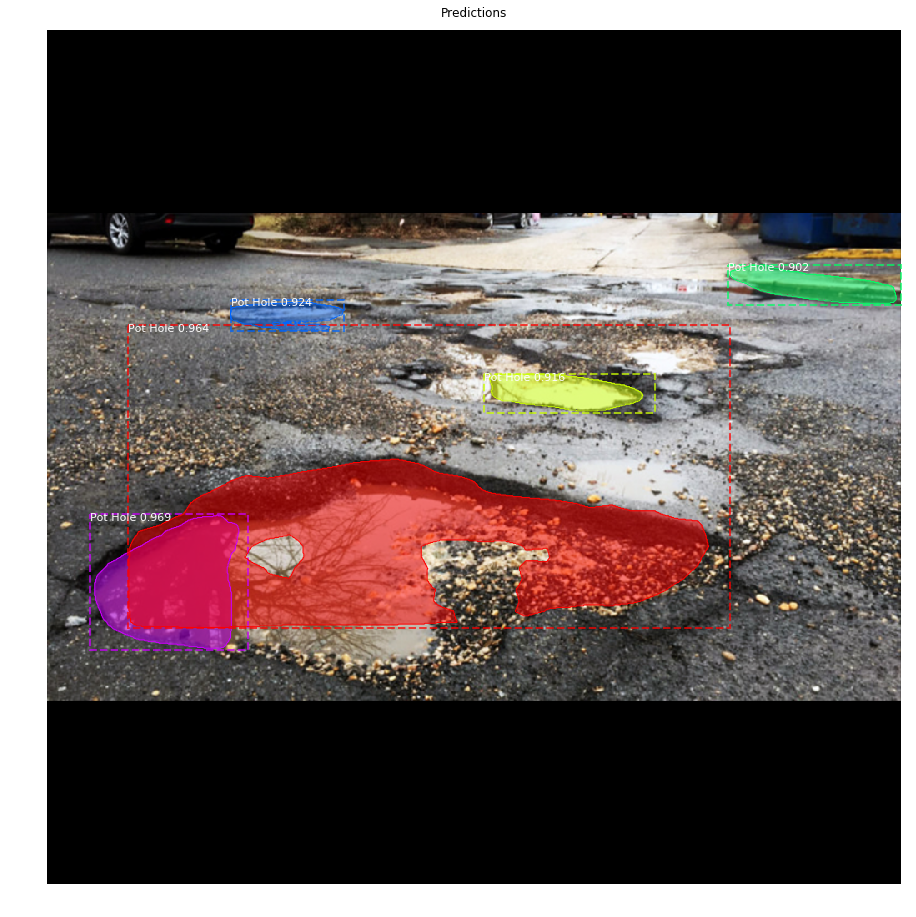

In [0]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob
# Root directory of the project
ROOT_DIR = os.getcwd()
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
import custom
%matplotlib inline
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "train_logs/pot hole20191008T0656")
custom_WEIGHTS_PATH = "mask_rcnn_pot hole_0004.h5"  # TODO: update this path

config = custom.CustomConfig()
custom_DIR = '/content/customdataset'
class InferenceConfig(config.__class__):
   # Run detection on one image at a time
   GPU_COUNT = 1
   IMAGES_PER_GPU = 1
config = InferenceConfig()
config.display()
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0
# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"
def get_ax(rows=1, cols=1, size=16):
   """Return a Matplotlib Axes array to be used in
   all visualizations in the notebook. Provide a
   central point to control graph sizes.
   Adjust the size attribute to control how big to render images
   """
   _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
   return ax
# Load validation dataset
dataset = custom.CustomDataset()
dataset.load_custom(custom_DIR, "val")
# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))
# Create model in inference mode
with tf.device(DEVICE):
   model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                             config=config)
# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(MODEL_DIR+'/'+custom_WEIGHTS_PATH, by_name=True)
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
   modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id,
                                      dataset.image_reference(image_id)))
# Run object detection


print(type(image))
results = model.detect([image], verbose=1)
# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                           dataset.class_names, r['scores'], ax=ax,
                           title="Predictions")


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

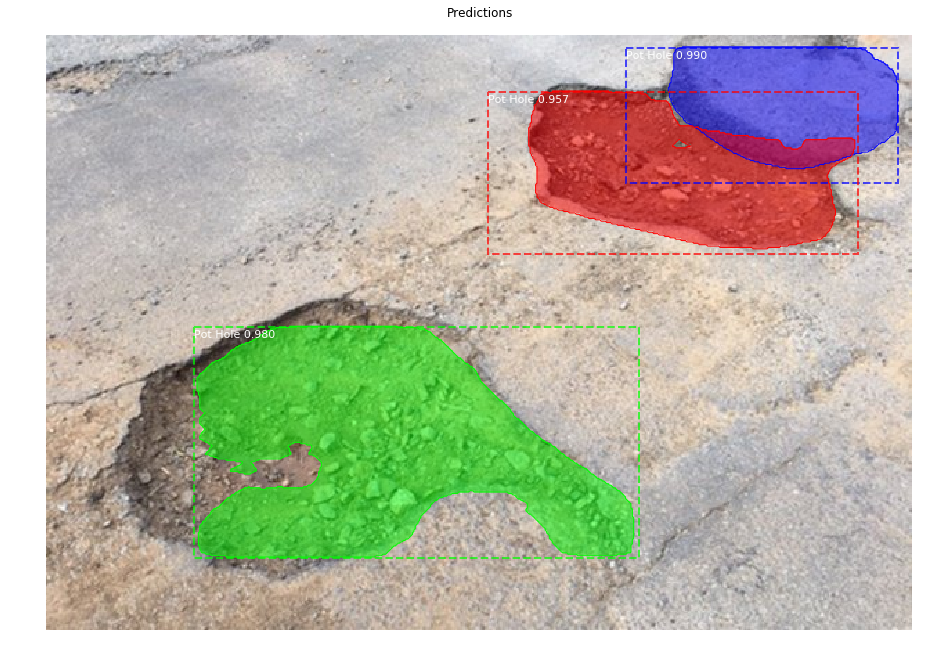

In [0]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob
# Root directory of the project
ROOT_DIR = os.getcwd()
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
import custom
%matplotlib inline
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "train_logs/pot hole20191008T0656")
custom_WEIGHTS_PATH = "mask_rcnn_pot hole_0005.h5"  # TODO: update this path

config = custom.CustomConfig()
custom_DIR = '/content/customdataset'
class InferenceConfig(config.__class__):
   # Run detection on one image at a time
   GPU_COUNT = 1
   IMAGES_PER_GPU = 1
config = InferenceConfig()
config.display()
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0
# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"
def get_ax(rows=1, cols=1, size=16):
   """Return a Matplotlib Axes array to be used in
   all visualizations in the notebook. Provide a
   central point to control graph sizes.
   Adjust the size attribute to control how big to render images
   """
   _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
   return ax
# # Load validation dataset
# dataset = custom.CustomDataset()
# dataset.load_custom(custom_DIR, "val")
# # Must call before using the dataset
# dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))
# Create model in inference mode
with tf.device(DEVICE):
   model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                             config=config)
# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(MODEL_DIR+'/'+custom_WEIGHTS_PATH, by_name=True)
# image_id = random.choice(dataset.image_ids)
# image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
# info = dataset.image_info[image_id]
# print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id,
#                                       dataset.image_reference(image_id)))
# Run object detection


#print(type(image))
image = cv2.imread('/content/49.0a957e0b420a4f1ea782434d46ae371a.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
results = model.detect([image], verbose=1)
# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                           dataset.class_names, r['scores'], ax=ax,
                           title="Predictions")